In [258]:
import calendar
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
inven_path='Data\\Inventory Dataset.xlsx'
new_inv_path='Data\\New Inventory.xlsx'

In [260]:
df_inventory=pd.read_excel(inven_path)
df_new_arrivals=pd.read_excel(new_inv_path)

## Inventory Dataset.xlsx

In [261]:
print("The Inventory dataset contains {} rows and {} columns.".format(df_inventory.shape[0],df_inventory.shape[1]))


The Inventory dataset contains 356 rows and 3 columns.


In [262]:
len(df_inventory['Item Number'].unique())

356

## New Inventory.xlsx

In [263]:
print("The New inventory dataset contains {} rows and {} columns.".format(df_new_arrivals.shape[0],df_new_arrivals.shape[1]))

The New inventory dataset contains 1039 rows and 3 columns.


In [264]:
len(df_new_arrivals['Item Number'].unique())

213

In [265]:
len(df_new_arrivals['Inventory Receive'].unique())

23

The inventory data set contains 356 unique item numbers and the number of items in that inventory. The new inventory dataset contains 1,039 rows of numbers <br> 
showing how many new items were added to inventory and when they arrived. The new inventory dataset contains 213 unique items, which means that out of 356 items,<br>
only 213 items were received on 23 different unique dates.

In [266]:

df_new_arrivals['Inventory Receive']= pd.to_datetime(df_new_arrivals['Inventory Receive'])
df_inventory['Date']=pd.to_datetime(df_inventory['Date'])
#df_inventory=df_inventory.sort_values(by=['Inventory Receive'],)

## Merging both files

In [267]:
df_merged = pd.merge(df_inventory, df_new_arrivals, on='Item Number', how='outer')
df_merged=df_merged.sort_values(by=['Inventory Receive'],ascending=True,key=lambda x: x.astype(np.int64))


In [268]:
pivot_table = df_merged.pivot_table(values='Total Item Qty', 
                             index='Item Number', 
                             columns='Inventory Receive', 
                             aggfunc='sum', 
                             fill_value=0)


In [269]:

for item_num,row in pivot_table.iterrows():
    try:
        on_stock = df_inventory[df_inventory['Item Number'] == item_num]['Inventory']
        on_stock=int(on_stock)
    except:
        on_stock=0

    for k in pivot_table.columns:
        on_stock=on_stock+row[k]
        row[k]=on_stock
        
    

C:\Users\prabh\AppData\Local\Temp\ipykernel_15724\4281683759.py:4: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



## Visualization

In [270]:
df_merged.columns

Index(['Item Number', 'Date', 'Inventory', 'Inventory Receive',
       'Total Item Qty'],
      dtype='object')

In [271]:
df_merged["Month"]=df_merged['Inventory Receive'].dt.month

In [272]:
month_total=df_merged.groupby('Month')['Total Item Qty'].sum()
#month_total=Inventory_Receive_sum=df_merged.groupby('Month')['Total Item Qty'].sum()

In [273]:
Inventory_sum=df_inventory['Inventory'].sum()
month_total[6]=Inventory_sum
month_total=month_total.sort_index(ascending=True)
month_total=pd.DataFrame(month_total)

In [274]:
item_recived=month_total

In [275]:
month_names = [calendar.month_name[i] for i in range(6, 13)]

In [277]:

for x in range(7, 6 + len(month_total['Total Item Qty'])):
    month_total.loc[x, 'Total Item Qty'] = month_total.loc[x - 1, 'Total Item Qty'] + month_total.loc[x, 'Total Item Qty']


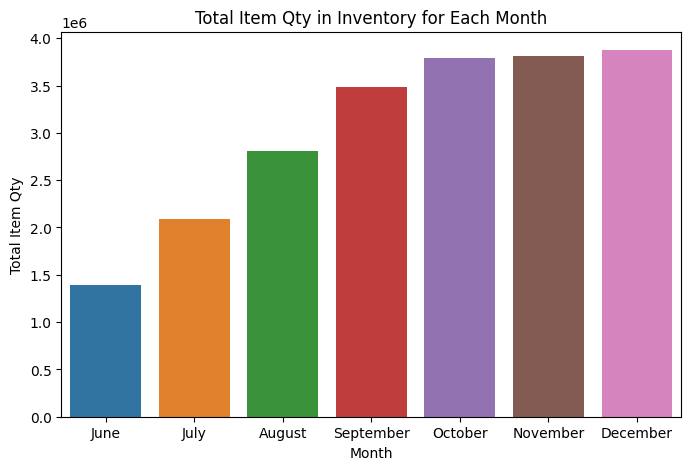

In [293]:
plt.figure(figsize=(8, 5))
sns.barplot(x=month_names, y=month_total['Total Item Qty'])

plt.xlabel('Month')
plt.ylabel('Total Item Qty')
plt.title('Total Item Qty in Inventory for Each Month')
plt.savefig('plots\\total_item_qty_plot.png')
plt.show()

In [286]:
recived=df_merged.groupby('Month')['Total Item Qty'].sum().values
recived=list(recived)
recived

[698592.0, 726094.0, 670252.0, 303826.0, 24848.0, 63172.0]

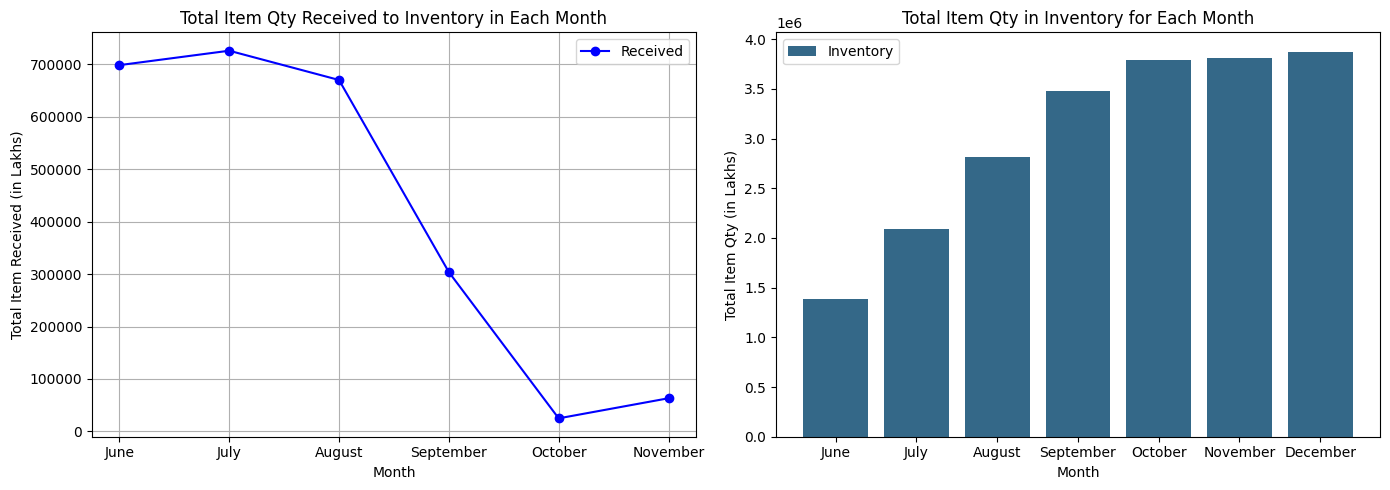

In [288]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Line plot
axs[0].plot(month_names[:-1], recived, marker='o', color='blue', label='Received')
axs[0].set_title('Total Item Qty Received to Inventory in Each Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Item Received (in Lakhs)')
axs[0].grid(True)
axs[0].legend()

# Bar plot
axs[1].bar(month_names, month_total['Total Item Qty'], color='#346888', label='Inventory')
axs[1].set_title('Total Item Qty in Inventory for Each Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Item Qty (in Lakhs)')
#axs[1].grid(True)
axs[1].legend()


plt.tight_layout()


plt.savefig('plots\\multiple_charts.png')

# Show the plots
plt.show()

Their interpretation provides valuable insight into inventory trends throughout the year. The observation that inventory additions are high in October-November and that inventory levels are at their lowest in June indicates that there may be a seasonality or pattern in inventory management. Additionally, given that on-hand inventory peaks at the end of the year, with around 3,000 stocks in circulation, this highlights the importance of year-end inventory management and its impact on overall levels. of stocks. , 